In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from hurst_exp import *
import matplotlib

plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

In [11]:
n_max = 15
b = 0.75
t, ts = bimus(a=b, n_max=15)

In [12]:
2**n_max

32768

In [13]:
df = pd.DataFrame()
df["t"] = t
df["data"] = ts
df.head()

,t,data
0,1,2.793968e-09
1,2,2.793968e-09
2,3,8.381903e-09
3,4,2.793968e-09
4,5,8.381903e-09


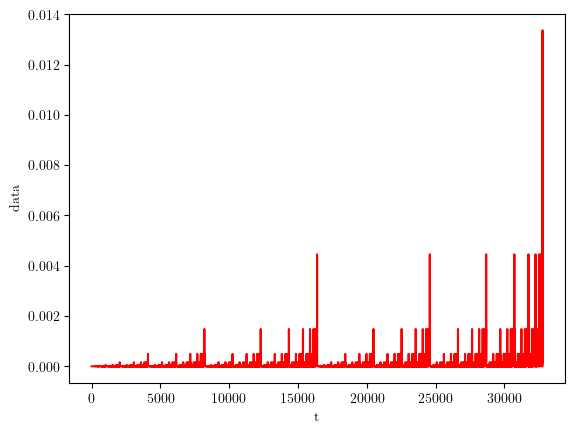

In [14]:
sns.lineplot(x="t", y="data", data=df, color="red")
plt.show()

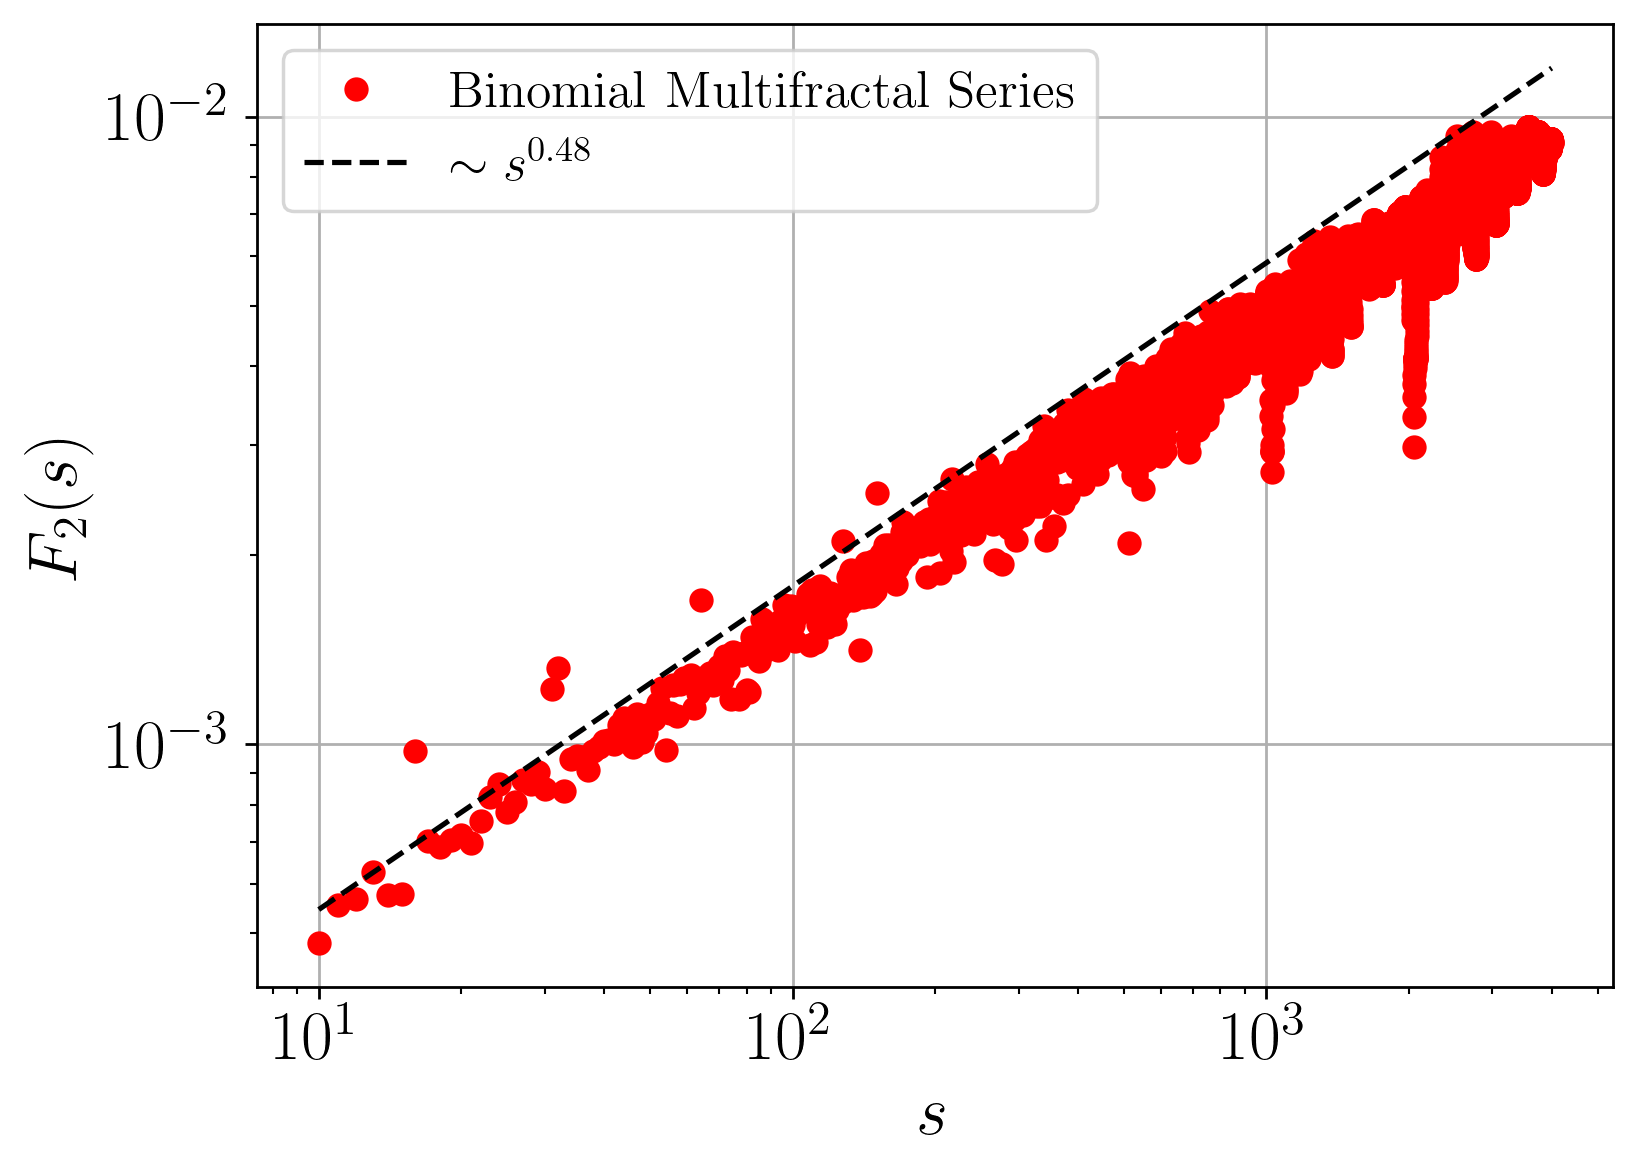

In [21]:
#s, f = mfdfa(df.data.values, q=10, min_scale=10, max_scale=4000, order=2, test=True)
#f = smooth_symmetric_window(f)
#x, y, params = XY_fit(s[:], f[:], x_range=[10, 4000])

x = np.linspace(10, 4000, 1000)
y = pl(x, params[0], h_bimus(a=b, q=10))#params[1]+0.8)

a = round(params[1],2)
plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label="Binomial Multifractal Series", color="red")
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()

a_parameter = str(b).replace(".", ",")
#plt.savefig(f"binomial_multifractal_a={a_parameter}.png", bbox_inches = "tight")
plt.show()

In [20]:
params # q=10

array([1.66742663e-04, 4.82071771e-01])

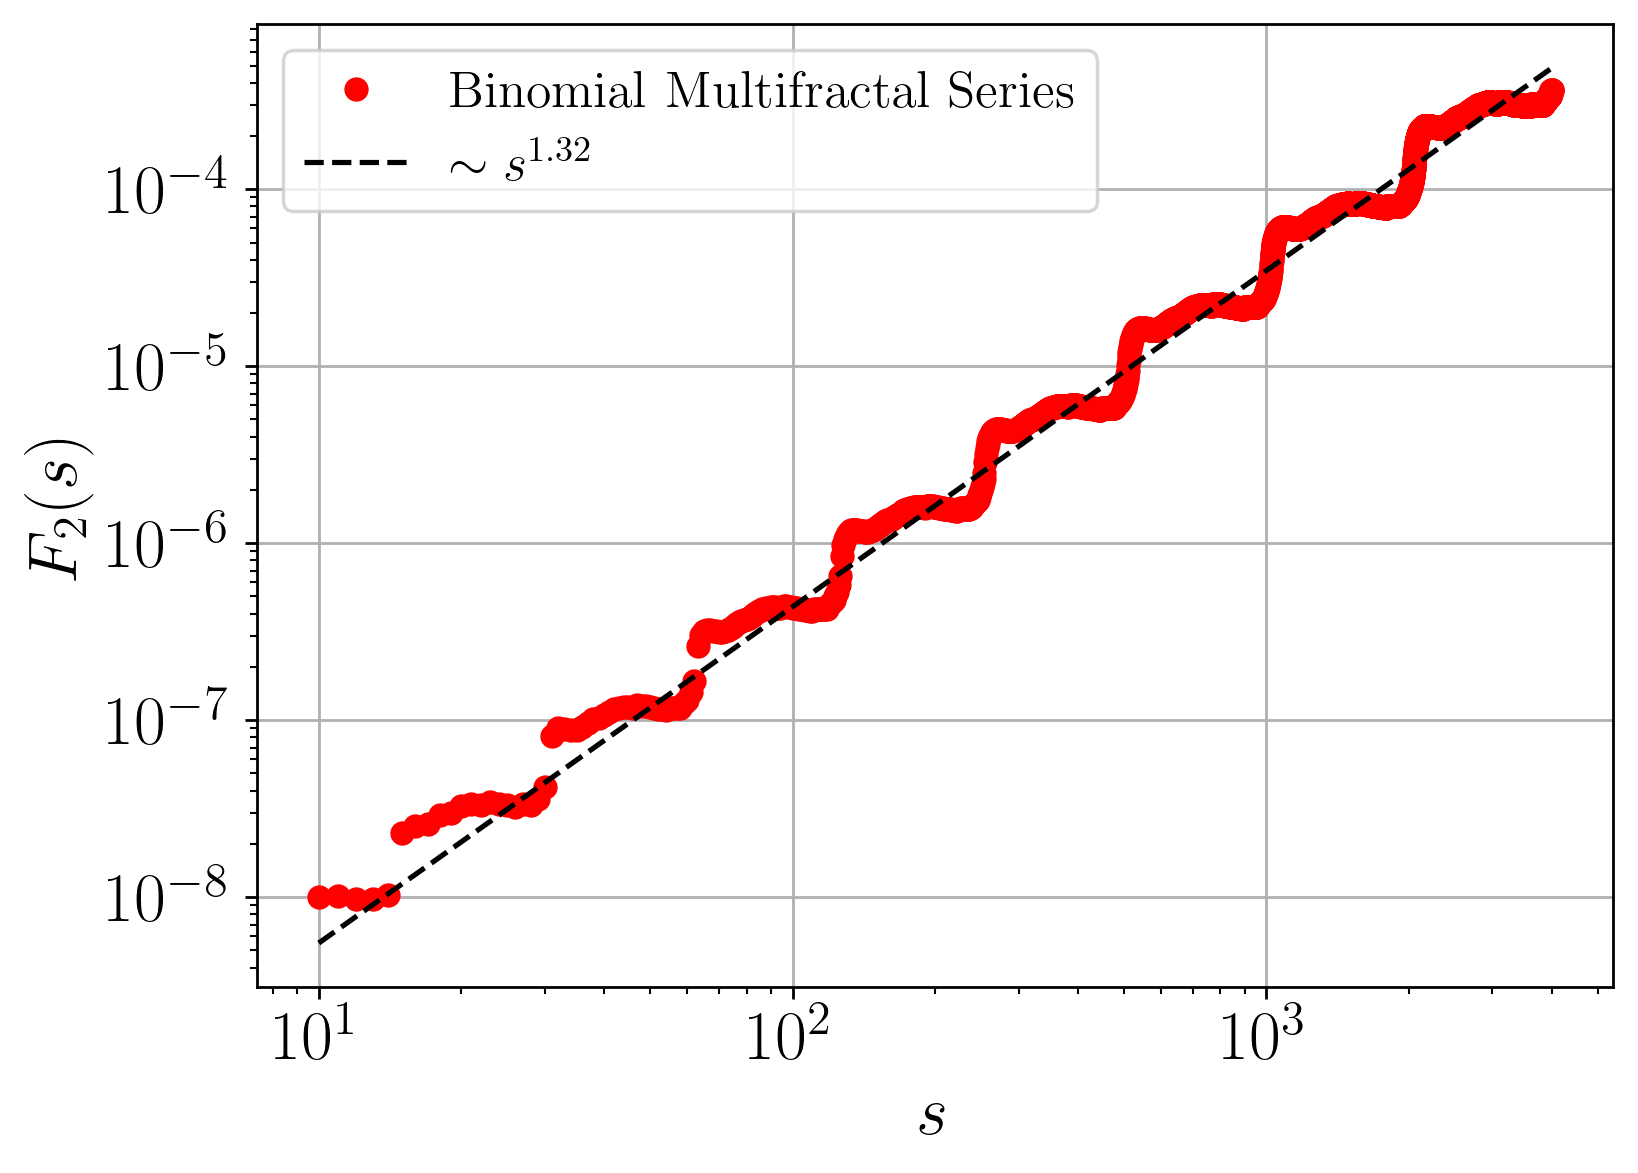

In [23]:
#s, f = mfdfa(df.data.values, q=-10, min_scale=10, max_scale=4000, order=2, test=True)
#f = smooth_symmetric_window(f)
#x, y, params = XY_fit(s[:], f[:], x_range=[10, 4000])

x = np.linspace(10, 4000, 1000)
y = pl(x, params[0]*0.01, h_bimus(a=b, q=-10))#params[1]+0.8)

a = round(params[1],2)
plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label="Binomial Multifractal Series", color="red")
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel("$F_2(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()

a_parameter = str(b).replace(".", ",")
#plt.savefig(f"binomial_multifractal_a={a_parameter}.png", bbox_inches = "tight")
plt.show()

In [24]:
params # q=-10

array([6.92998129e-09, 1.31540757e+00])

In [19]:
h_bimus(q=10)

0.5150350560828119

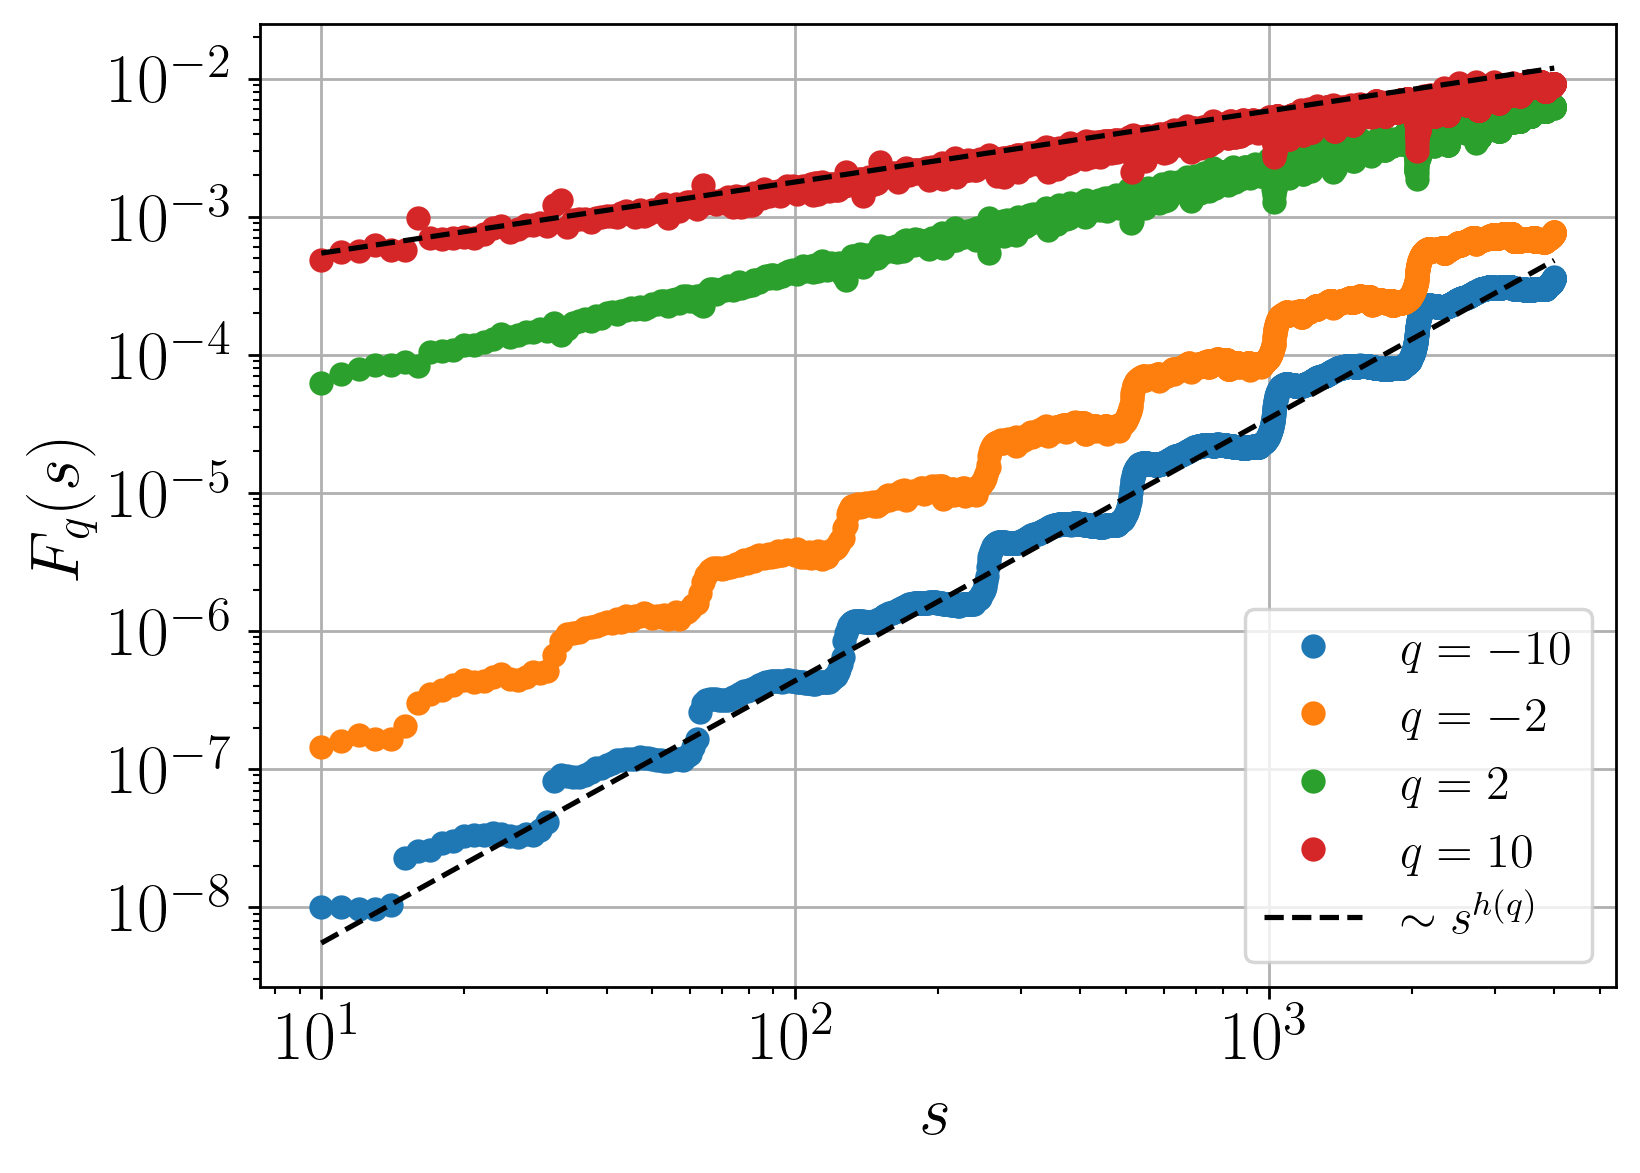

In [30]:
Q = [-10, -2, 2, 10]

plt.figure(dpi=250, figsize=(7, 5))

for q in Q:
    s, f = mfdfa(df.data.values, min_scale=10, max_scale=4000, order=2, test=True, q=q)
    plt.plot(s, f, "o", label=rf"$q={{{q}}}$")
    if q == -10:
        x = np.linspace(10, 4000, 1000)
        y = pl(x, 6.92998129e-11, h_bimus(a=b, q=q))
        plt.plot(x, y, "k--")
    elif q == 10:
        x = np.linspace(10, 4000, 1000)
        y = pl(x, 1.66742663e-04, h_bimus(a=b, q=q))
        plt.plot(x, y, "k--", label=r"$\sim s^{h(q)}$")


# Y AXES
plt.ylabel("$F_q(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=14)
plt.grid()

a_parameter = str(b).replace(".", ",")
plt.savefig(f"binomial_multifractal_q_a={a_parameter}.png", bbox_inches = "tight")
plt.show()

In [28]:
a_parameter

'0,75'

# ARBITRARY TIME SERIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from hurst_exp import *
import matplotlib

plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

In [ ]:
n_points = 10000
beta = -3
ts = generate_noise_series(n_points, beta)

/home/ivan/Research/uchile/hurst_exp/hurst_exp.py:205: RuntimeWarning: divide by zero encountered in power
  f_amplitude = np.abs(freqs) ** (beta / 2.0)


In [58]:
df = pd.DataFrame()
df["t"] = range(n_points)
df["data"] = ts

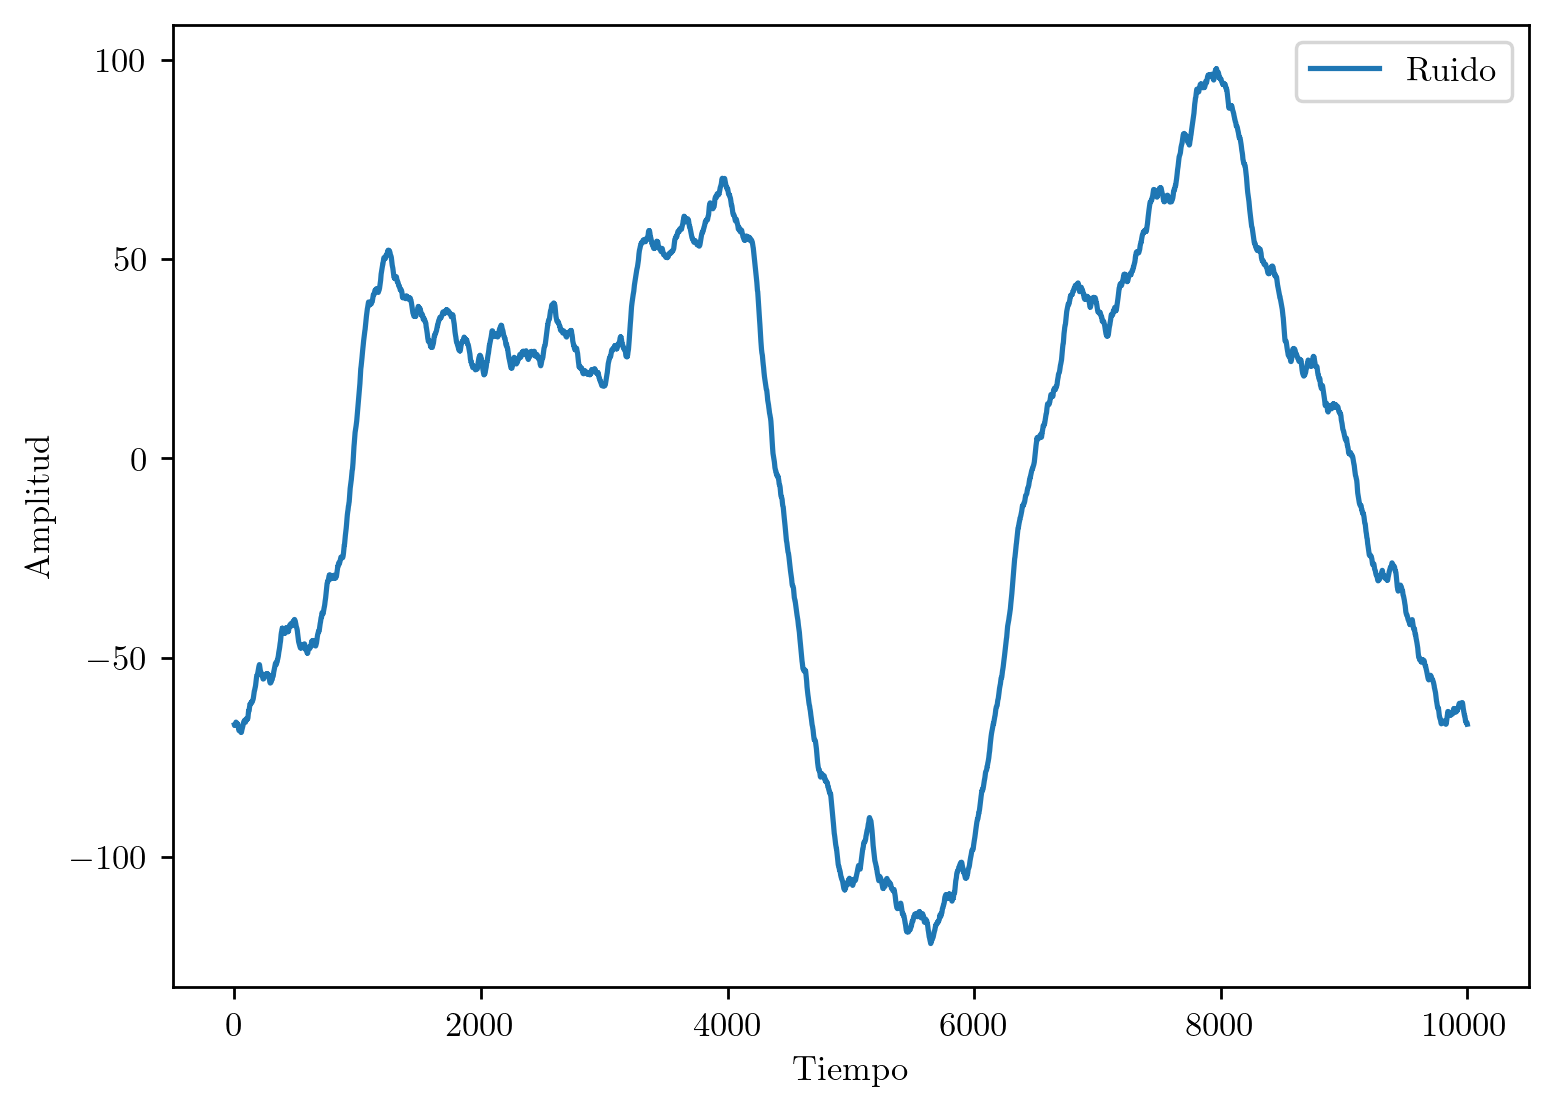

In [59]:
plt.figure(dpi=250, figsize=(7, 5))

plt.plot(ts, label="Ruido")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

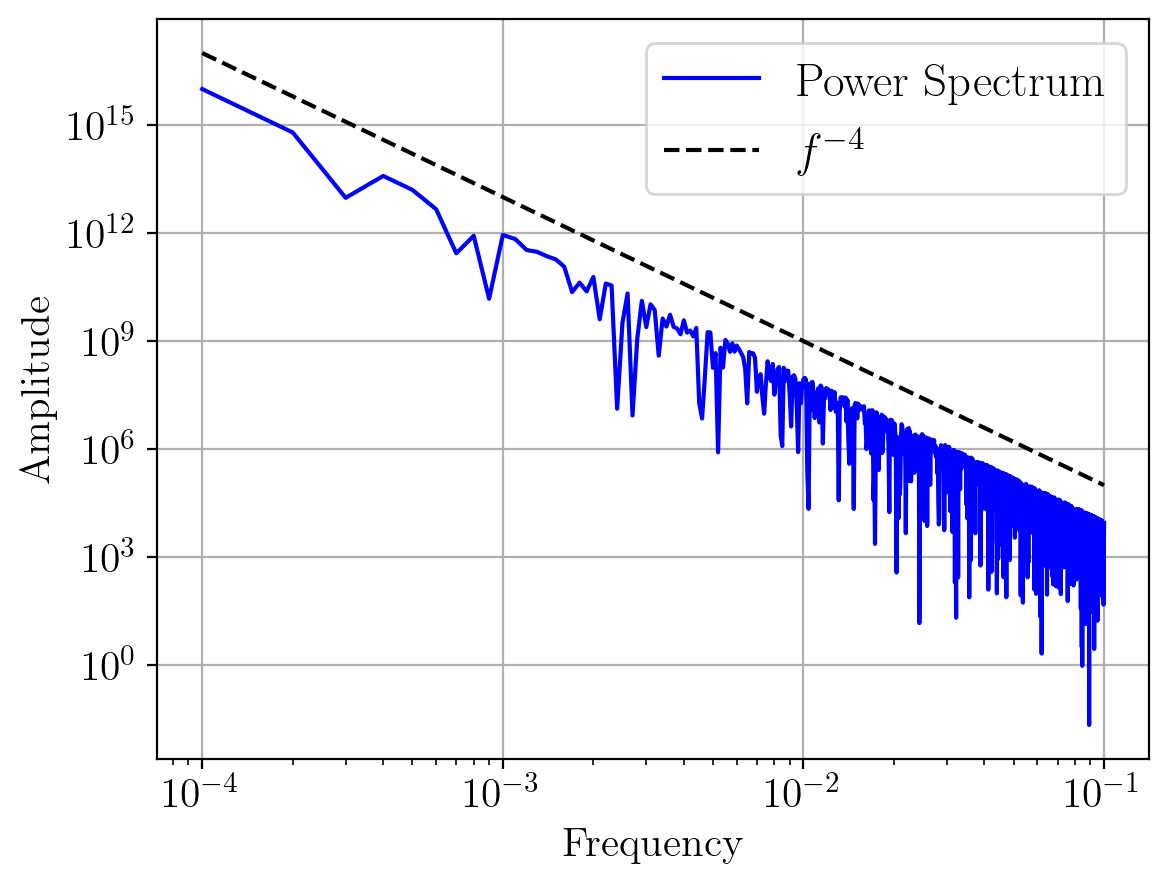

In [53]:
freqs, spectrum = compute_spectrum(ts)

mask = (freqs != 0) & (spectrum != 0)

x = np.linspace(1e-4, 0.1, 1000)
y = pl(x, 10, beta)

# Aplicar la máscara a ambos arrays
freqs_filtered = freqs[mask]
spectrum_filtered = spectrum[mask]

plt.figure(dpi = 200)
# Graficar ambos espectros
plt.plot(freqs_filtered[:1000], spectrum_filtered[:1000], label="Power Spectrum", color="Blue")
plt.plot(x, y, "k--", label=fr"$f^{{{beta}}}$")

plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Amplitude", fontsize=15)
plt.yscale("log")  # Escala logarítmica para amplitud
plt.xscale("log")  # Escala logarítmica para frecuencia
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize=17)
plt.grid()
plt.savefig(fr"spectrum_f^{{{beta}}}_noise.png", bbox_inches="tight")
plt.show()

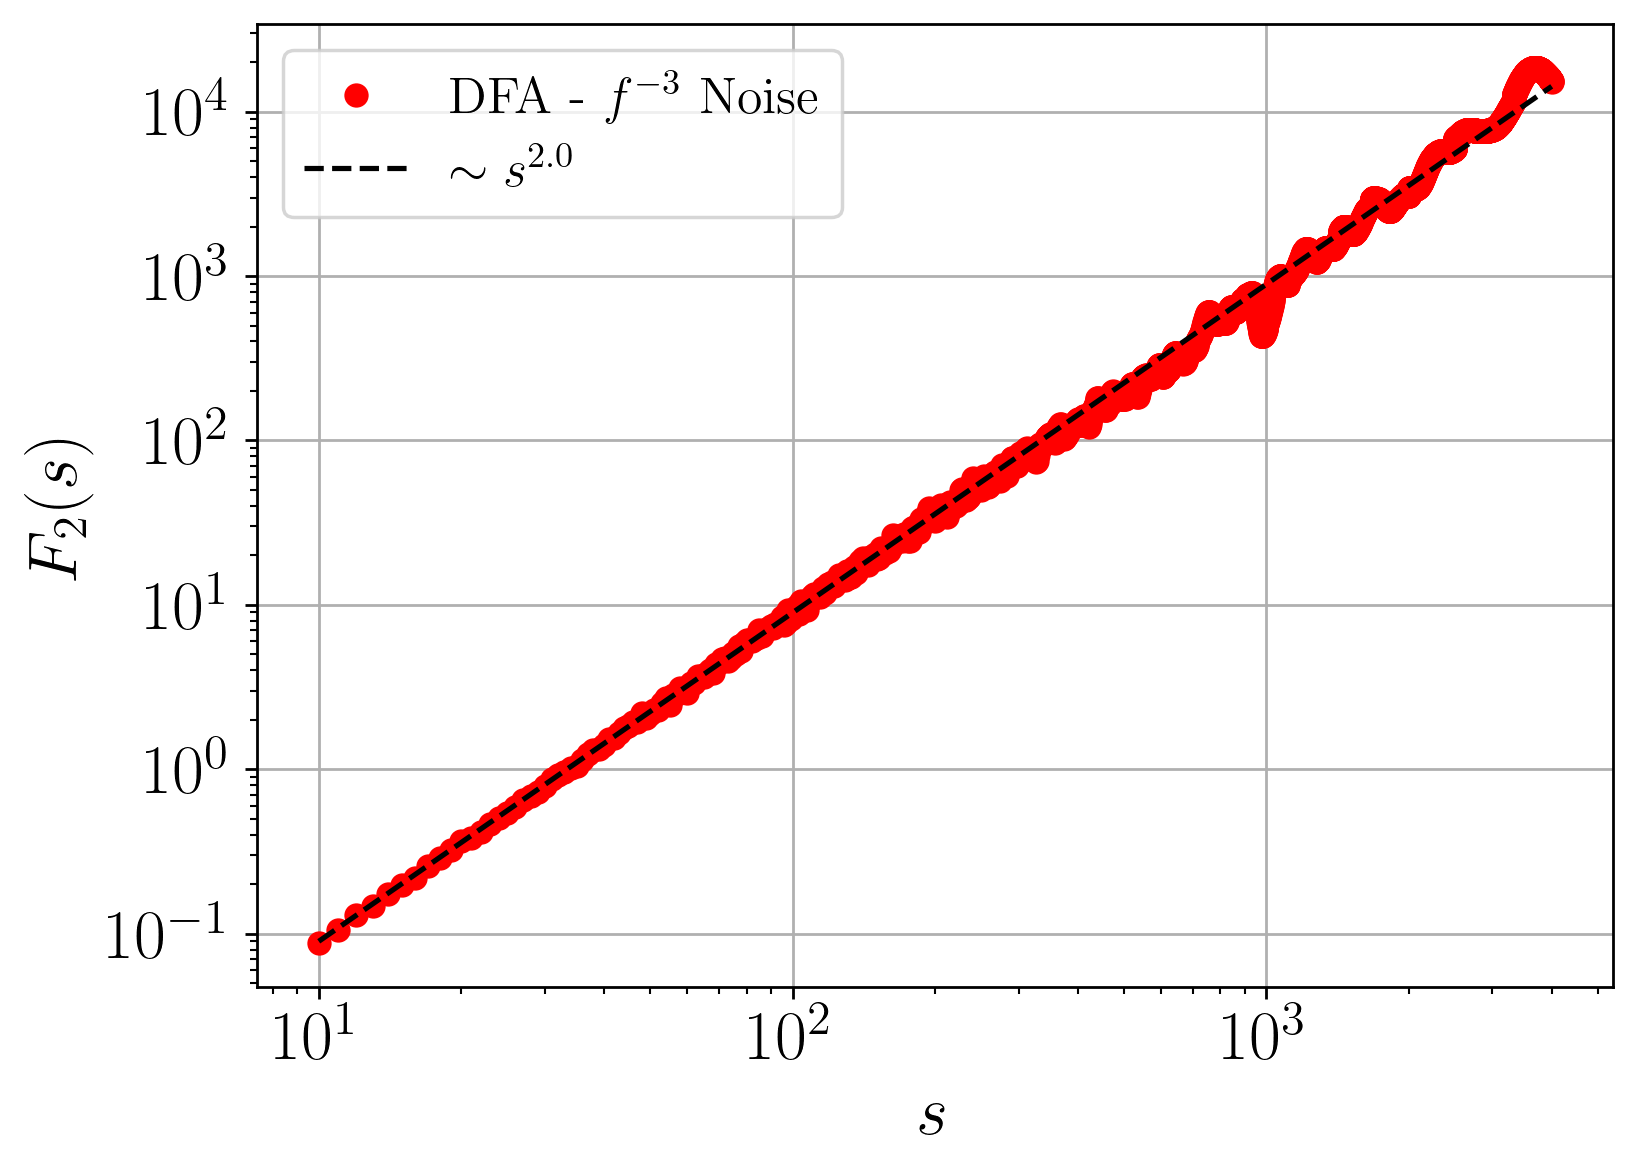

In [62]:
s, f = mfdfa(df.data.values, min_scale=10, max_scale=4000, order=2, test=True, q=2)

x, y, params = XY_fit(s[:100], f[:100], x_range=[10, 4000])

a = round(params[-1], 2)
plt.figure(dpi=250, figsize=(7, 5))
plt.plot(s, f, "o", label=fr"DFA - $f^{{{beta}}}$ Noise", color="red")
plt.plot(x, y, "k--", label=fr"$\sim s^{{{a}}}$")

# Y AXES
plt.ylabel(fr"$F_{{{2}}}(s)$", fontsize=20)
plt.yticks(size=20)
plt.yscale("log")

# X AXES
plt.xlabel("$s$", fontsize=20)
plt.xticks(size=20)
plt.xscale("log")

plt.legend(fontsize=15)
plt.grid()

plt.savefig(fr"F2_f^{{{beta}}}_noise.png", bbox_inches = "tight")
plt.show()

# Hurst vs beta

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from hurst_exp import *
import matplotlib
from tqdm.notebook import tqdm

plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams["text.usetex"] = True

In [2]:
betas = [0.5*i for i in range(-4, 9)]
n_points = 10000
H = []
betas

[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

In [3]:
for beta in tqdm(betas):
    ts = generate_noise_series(n_points, -beta)
    df = pd.DataFrame()
    df["t"] = range(n_points)
    df["data"] = ts

    h = mfdfa(df.data.values, min_scale=10, max_scale=1000, order=2, q=2)
    H.append(h)


  0%|          | 0/13 [00:00<?, ?it/s]

/home/ivan/Research/uchile/hurst_exp/hurst_exp.py:207: RuntimeWarning: divide by zero encountered in power
  f_amplitude = np.abs(freqs) ** (beta / 2.0)
/home/ivan/Research/uchile/hurst_exp/hurst_exp.py:207: RuntimeWarning: divide by zero encountered in power
  f_amplitude = np.abs(freqs) ** (beta / 2.0)
/home/ivan/Research/uchile/hurst_exp/hurst_exp.py:207: RuntimeWarning: divide by zero encountered in power
  f_amplitude = np.abs(freqs) ** (beta / 2.0)
/home/ivan/Research/uchile/hurst_exp/hurst_exp.py:207: RuntimeWarning: divide by zero encountered in reciprocal
  f_amplitude = np.abs(freqs) ** (beta / 2.0)
/home/ivan/Research/uchile/hurst_exp/hurst_exp.py:207: RuntimeWarning: divide by zero encountered in power
  f_amplitude = np.abs(freqs) ** (beta / 2.0)
/home/ivan/Research/uchile/hurst_exp/hurst_exp.py:207: RuntimeWarning: divide by zero encountered in power
  f_amplitude = np.abs(freqs) ** (beta / 2.0)
/home/ivan/Research/uchile/hurst_exp/hurst_exp.py:207: RuntimeWarning: divide

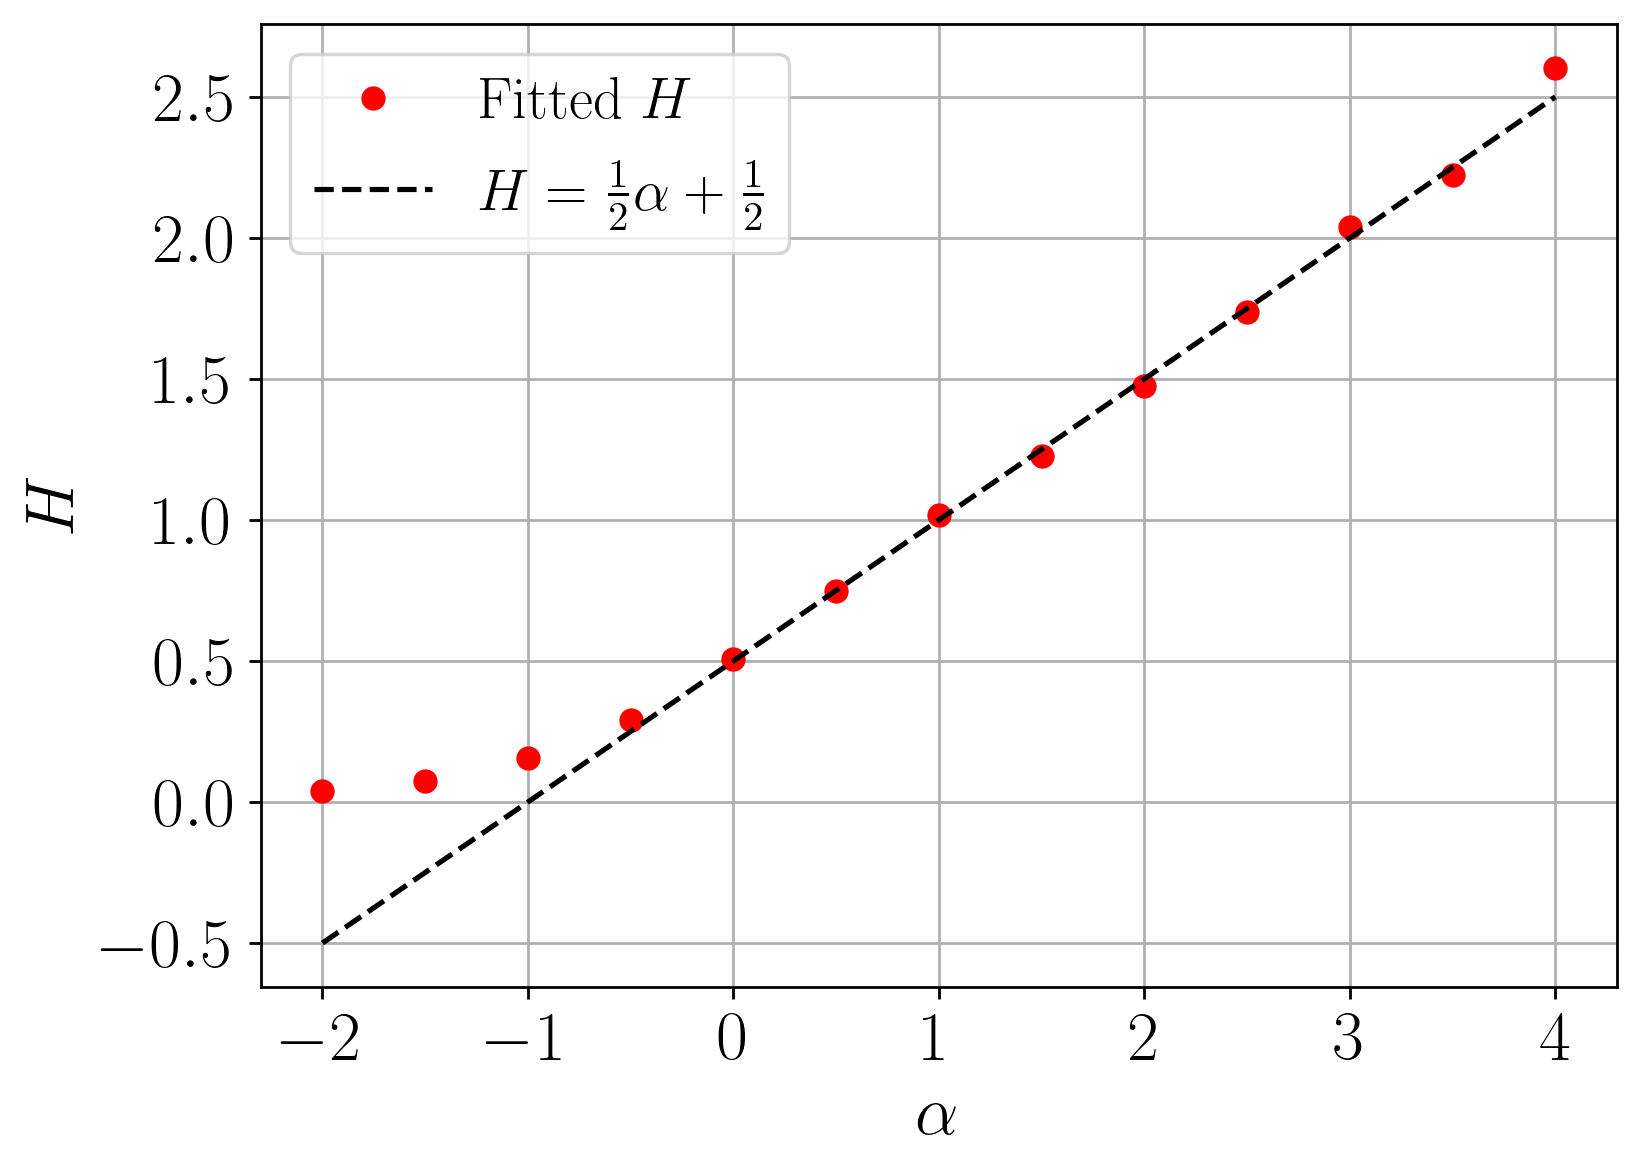

In [5]:
x = np.linspace(-2, 4, 1000)
y = 0.5 + 0.5*x


plt.figure(dpi=250, figsize=(7, 5))
plt.plot(betas, H, "o", color="red", label="Fitted $H$")
plt.plot(x, y, "k--", label = r"$H = \frac{1}{2}\alpha + \frac{1}{2}$")

# Y AXES
plt.ylabel(fr"$H$", fontsize=20)
plt.yticks(size=20)
#plt.yscale("log")

# X AXES
plt.xlabel(fr"$\alpha$", fontsize=20)
plt.xticks(size=20)
#plt.xscale("log")

plt.legend(fontsize=17)
plt.grid()

plt.savefig(fr"H_alpha_extended.png", bbox_inches = "tight")
plt.show()